# Sujet : Real Estate

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm


In [3]:
# mettre le nombre max de colonne afficher d'un dataframe à 27
pd.set_option('display.max_columns', 28)

In [4]:
# on récupère les données
data = pd.read_csv('X_train_J01Z4CN.csv', sep = ',')
response = pd.read_csv('y_train_OXxrJt1.csv',sep = ',')


In [5]:
data.shape

(37368, 27)

In [6]:
data

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,energy_performance_category,ghg_value,ghg_category,exposition,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,D,52.0,E,NaN,5.0,4.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,NaN,NaN,NaN,Sud,2.0,1.0,NaN,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,D,44.0,E,NaN,4.0,3.0,NaN,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37363,35881571,appartement,43.480292,-1.484324,bayonne,64100,2995.0,NaN,NaN,255.0,E,59.0,F,NaN,1.0,NaN,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37364,35890109,appartement,48.861391,2.401158,paris-20eme,75020,36.0,4.0,NaN,229.0,D,53.0,E,Sud,2.0,1.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37365,36010245,appartement,44.397837,-1.164312,biscarrosse,40600,99.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
37366,35864579,duplex,48.864204,2.808693,magny-le-hongre,77700,9281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

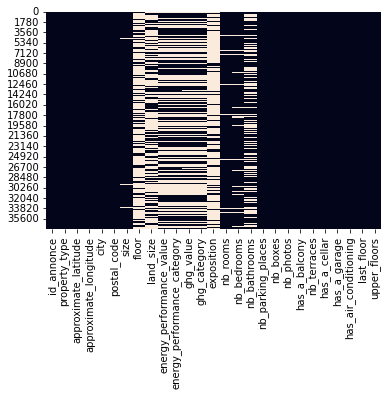

In [7]:
# afficher une carte des Nan du df avec seaborn 
sns.heatmap(data.isnull(), cbar=False)

In [8]:
# tableau des colonnes et des Nan associé en pourcentage trié par ordre décroissant
data.isnull().sum().sort_values(ascending=False)/len(data)

exposition                     0.756637
floor                          0.739269
land_size                      0.583039
ghg_category                   0.504121
ghg_value                      0.504121
energy_performance_category    0.489724
energy_performance_value       0.489724
nb_bathrooms                   0.355197
nb_bedrooms                    0.073137
nb_rooms                       0.041908
size                           0.013702
has_a_cellar                   0.000000
nb_photos                      0.000000
has_a_garage                   0.000000
has_air_conditioning           0.000000
last_floor                     0.000000
nb_terraces                    0.000000
has_a_balcony                  0.000000
id_annonce                     0.000000
nb_boxes                       0.000000
nb_parking_places              0.000000
property_type                  0.000000
postal_code                    0.000000
city                           0.000000
approximate_longitude          0.000000


<AxesSubplot:>

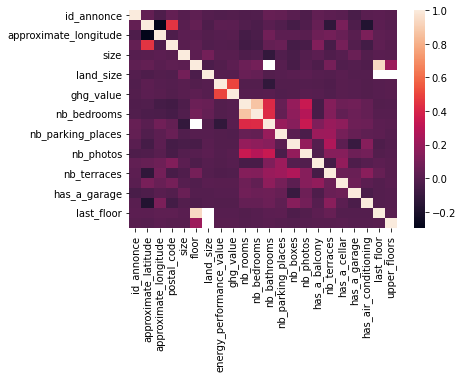

In [9]:
# tracer la matrice de corélation entre les variables avec seaborn
sns.heatmap(data.corr())

In [10]:
# compter le nombre de colonne par type 
data.dtypes.value_counts()

float64    20
object      5
int64       2
dtype: int64

In [11]:
# créer un liste pour les colonnes de type object et l'afficher
col_obj = data.select_dtypes(include=['object']).columns
col_int = data.select_dtypes(include=['int64']).columns
col_float = data.select_dtypes(include=['float64']).columns
col_obj
col_int
col_float

Index(['approximate_latitude', 'approximate_longitude', 'size', 'floor',
       'land_size', 'energy_performance_value', 'ghg_value', 'nb_rooms',
       'nb_bedrooms', 'nb_bathrooms', 'nb_parking_places', 'nb_boxes',
       'nb_photos', 'has_a_balcony', 'nb_terraces', 'has_a_cellar',
       'has_a_garage', 'has_air_conditioning', 'last_floor', 'upper_floors'],
      dtype='object')

In [12]:
# faire le tableau du nombre de valeur possible dans les colonnes de type object
data[col_obj].nunique()

property_type                    22
city                           8643
energy_performance_category       7
ghg_category                      7
exposition                       12
dtype: int64

## Création train et test set

On crée un train et un test set, on travaillera sur le train set et on testera notre modèle avec le test set

In [88]:
# création d'un trainset et d'un test set à partir de data
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)

On crée une fonction qui permet d'extraire les id du reste du df

In [14]:
# création d'un fonction qui retourne d'une part la colonne id_annonce et de l'autre le reste du df
def split_id(df):
    id_annonce = df['id_annonce']
    df = df.drop(columns=['id_annonce'])
    return id_annonce, df

In [15]:
train_id , X_train = split_id(train)

In [16]:
# on créer les y issue de response associé au découpage en train et test
y_train = response[response['id_annonce'].isin(train_id)]
y_train = y_train.drop(columns=['id_annonce'])
print(y_train)

          price
0      355000.0
1      190000.0
2       39000.0
3      299000.0
5      249000.0
...         ...
37363  190000.0
37364  399000.0
37365  328000.0
37366  463000.0
37367   69930.0

[29894 rows x 1 columns]


## Pre processing

In [17]:
# copy de train en df
df = train.copy()

### Correspondance : numérisation de toutes les variables

Pour que notre dataset puisse être mis dans un modèle de ML (mis à part quelque exception telque les arbres de décisons), il lui faut des données numériques. On va donc transformer nos données de type object en type float ou int

On va dans un premier temps supprimer les colonnes de types object qui ne sont pas catégorisés et pour les autres on va les encoder

In [27]:
# on enlève la colonne city de df et df_2
df = df.drop(['city'], axis=1)
df_2 = df_2.drop(['city'], axis=1)

In [82]:
# on redéfinie col_obj
col_obj = df.select_dtypes(include=['object']).columns

# on crée un dictionnaire qui va de 1 à n avec les valeurs possibles dans les variables de type object de df
dico = {}
for col in col_obj:
    dico[col] = list(df[col].unique())

# on créer des sous dictionnaire qui associe une valeur possible d'une clé à un entier 
dico_1 = {}
for col in col_obj:
    dico_1[col] = {}
    for i in range(len(dico[col])):
        dico_1[col][dico[col][i]] = i+1

# pour les clé energy_performance_category et ghg_category, il faut que les nombres soit associé aux lettre dans l'odre alphabétique
dico_1['energy_performance_category'] = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
dico_1['ghg_category'] = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

# on crée une fonction qui va remplacer les valeurs des variables de type object par les entiers associé dans le dictionnaire
def replace(df, dico):
    for col in col_obj:
        df[col] = df[col].replace(dico[col])
    return df

# on applique la fonction replace sur df et df_2
df = replace(X_train, dico_1)

### Gestion des Nan

#### Remplacement par la moyenne :

On commence par supprimer les colonnes inutiles (exposition et floor).

On garde id car on la stockera pour affilier nos résultat à la fin.

In [83]:
# suppression des colonnes exposition et floor
df = df.drop(['exposition', 'floor'], axis=1)

On recrée les listes des colonnes 

In [19]:
# créer un liste pour les colonnes de type object et l'afficher
col_obj = df.select_dtypes(include=['object']).columns
col_int = df.select_dtypes(include=['int64']).columns
col_float = df.select_dtypes(include=['float64']).columns

Dans un premier temps, on va remplacer les nan des colonnes utiles par la moyenne qd c'est un float ou par l'occurence la plus récurrente quand c'est un int ou object

**Remarque** : on ne s'occupe pas des colonnes de type int car elles sont complètes ! 

On regarde les moyennes et les valeurs les plus occurentes

In [20]:
# faire un tableau avec les valeurs moyennes pour chaque variable de type float et la valeur la plus répérée pour les types int et object
df[col_float].mean()

approximate_latitude          46.539386
approximate_longitude          2.614000
size                        1093.724601
land_size                   4272.258002
energy_performance_value     206.508638
ghg_value                     32.625913
nb_rooms                       4.240524
nb_bedrooms                    2.859279
nb_bathrooms                   0.920338
nb_parking_places              0.290694
nb_boxes                       0.179033
nb_photos                      8.003479
has_a_balcony                  0.148759
nb_terraces                    0.308523
has_a_cellar                   0.201479
has_a_garage                   0.053656
has_air_conditioning           0.040376
last_floor                     0.004014
upper_floors                   0.000268
dtype: float64

In [21]:
df[col_obj].mode().iloc[0]

property_type                  appartement
city                              toulouse
energy_performance_category              D
ghg_category                             B
Name: 0, dtype: object

In [22]:
# remplacer les nan des variables de type float par la moyenne 
for col in col_float:
    df[col].fillna(df[col].mean(), inplace=True) 

In [23]:
# remplacer les nan des variables de type object par la valeur la plus répétée
for col in col_obj:
    df[col].fillna(df[col].value_counts().index[0], inplace=True)
   

On vérifie que toutes les colonnes ne contiennent plus de Nan

In [24]:
df.isnull().sum().sort_values(ascending=False)/len(data)

id_annonce                     0.0
nb_bedrooms                    0.0
last_floor                     0.0
has_air_conditioning           0.0
has_a_garage                   0.0
has_a_cellar                   0.0
nb_terraces                    0.0
has_a_balcony                  0.0
nb_photos                      0.0
nb_boxes                       0.0
nb_parking_places              0.0
nb_bathrooms                   0.0
nb_rooms                       0.0
property_type                  0.0
ghg_category                   0.0
ghg_value                      0.0
energy_performance_category    0.0
energy_performance_value       0.0
land_size                      0.0
size                           0.0
postal_code                    0.0
city                           0.0
approximate_longitude          0.0
approximate_latitude           0.0
upper_floors                   0.0
dtype: float64

#### Cas par Interpolation

Ici, on ne remplace plus par la valeur moyenne mais par interpolation, cela permet d'avoir une estimation plus juste car on prend en compte les données existantes.

In [25]:
# copy de train en df 
df_2 = train.copy()
# suppression des colonnes exposition et floor
df_2 = df_2.drop(['exposition', 'floor'], axis=1)
# créer un liste pour les colonnes de type object et l'afficher
col_obj = df_2.select_dtypes(include=['object']).columns
col_int = df_2.select_dtypes(include=['int64']).columns
col_float = df_2.select_dtypes(include=['float64']).columns

In [26]:
# remplacer les nan dans les colonnes de type float par interpolation
for col in col_float:
    df_2[col] = df_2[col].interpolate(method='linear', limit_direction='forward', axis=0)

# remplacer les nan dans les colonnes de type object par interpolation
for col in col_obj:
    df_2[col] = df_2[col].interpolate(method='linear', limit_direction='forward', axis=0)

#### Cas avec un KNNimputer

In [84]:
df

,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,land_size,energy_performance_value,energy_performance_category,ghg_value,ghg_category,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
23985,1,48.728440,2.418010,1,94290,175.0,347.0,229.0,4.0,NaN,NaN,11.0,9.0,1.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20903,2,47.700325,7.299296,2,68720,80.0,NaN,52.0,2.0,6.0,2.0,4.0,3.0,1.0,1.0,0.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
34264,3,48.002677,2.530489,3,45270,1000.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19865,2,48.630255,2.452693,4,91000,36.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,0.0,1.0,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
12403,1,43.381364,3.187265,5,34490,280.0,625.0,149.0,3.0,35.0,4.0,9.0,7.0,1.0,1.0,1.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,2,43.702502,7.253023,123,6300,114.0,NaN,167.0,4.0,39.0,5.0,4.0,3.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6265,1,44.265965,4.518505,2583,30760,110.0,629.0,NaN,NaN,NaN,NaN,4.0,2.0,NaN,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11284,1,43.716703,1.433648,6692,31150,85.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,1.0,1.0,0.0,8.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
860,1,45.177145,4.816430,4082,26240,140.0,2939.0,NaN,NaN,NaN,NaN,4.0,3.0,1.0,0.0,0.0,16.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [85]:
# utilisation d'un KNNimputer pour combler les Nan
df_3 =  df.copy()
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_3 = pd.DataFrame(imputer.fit_transform(df_3), columns=df_3.columns)


### Normalisation

Afin que nos features aient toutes le même poids à l'origine, on va les normaliser avec un *Robust Scaler* qui n'est pas ou peu sensible aux valeurs abérantes.

In [86]:
def resume_for_norm(df2):
    df = df2.copy()
    df = df.drop(['exposition', 'floor'], axis=1)
    df = df.drop(['city'], axis=1)
    df = replace(df, dico_1)
    df = pd.DataFrame(imputer.transform(df), columns=df.columns)
    return df

In [92]:
ref = resume_for_norm(train)

KeyError: 'city'

In [31]:
# on va créer un robust scaler à partir de notre df que l'on réutilisera par la suite à traver la fonction normalisation
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
robust_scaler.fit(ref)

# on crée une fonction qui va normaliser les données en fonction du robust scaler
def normalisation(df, robust_scaler):
    df = pd.DataFrame(robust_scaler.transform(df), columns=df.columns)
    return df

# on crée la fonction qui à un df et un robust_scaler retourne les valeurs d'origine
def inverse_normalisation(df, robust_scaler):
    df = pd.DataFrame(robust_scaler.inverse_transform(df), columns=df.columns)
    return df

#### Fonction qui résume le preprocessing

In [32]:
# on fait la fonction de preprocessing qui prend un dataframe et réalise les étapes précédentes

# Remarque : on a déjà dit qui était col_float , col_obj et dico_
# Attention, le prix aussi est scale
def preprocessing(df2,robust_scaler,imputer):
    df = df2.copy()
    id_df , df = split_id(df)
    df = df.drop(['exposition', 'floor'], axis=1)
    df = df.drop(['city'], axis=1)
    df = replace(df, dico_1)
    df = pd.DataFrame(imputer.transform(df), columns=df.columns)
    df = normalisation(df,robust_scaler)
    return id_df , df

In [33]:
id_X_train , X_train_prep = preprocessing(train,robust_scaler)

In [34]:
X_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29894 entries, 0 to 29893
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   property_type                29894 non-null  float64
 1   approximate_latitude         29894 non-null  float64
 2   approximate_longitude        29894 non-null  float64
 3   postal_code                  29894 non-null  float64
 4   size                         29894 non-null  float64
 5   land_size                    29894 non-null  float64
 6   energy_performance_value     29894 non-null  float64
 7   energy_performance_category  29894 non-null  float64
 8   ghg_value                    29894 non-null  float64
 9   ghg_category                 29894 non-null  float64
 10  nb_rooms                     29894 non-null  float64
 11  nb_bedrooms                  29894 non-null  float64
 12  nb_bathrooms                 29894 non-null  float64
 13  nb_parking_place

### Import de la métrique utilisée

In [35]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

def custom_metric_function(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)*100

# Transformer cette métrique en score en utilisant make_scorer
from sklearn.metrics import make_scorer
custom_metric = make_scorer(custom_metric_function, greater_is_better=False)

In [36]:
# évalution d'une liste de modèle
def score_models(models, X_train, y_train):
    scores = []
    for model in tqdm(models):
        score = cross_val_score(model, X_train, y_train.values.ravel(), cv=5, scoring=custom_metric)
        scores.append(score)
    return scores

In [37]:
# on crée une fonction qui va calculer le score d'un modèle à partir de custom_metric_function
def score_model(model, X_train, y_train):
    score = cross_val_score(model, X_train, y_train.values.ravel(), cv=5, scoring=custom_metric)
    return score

### Choix du model

Dans cette partie nous allons choisir plusieurs modèles que nous allons tester

In [38]:
# faire une liste des modèles issues de scikit learn généralement utilisé dans des problèmes de régression linéaire
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

# on crée une liste de modèles
models_total = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), SGDRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), MLPRegressor()]
models = [LinearRegression(), SGDRegressor(), RandomForestRegressor(),  SVR(), KNeighborsRegressor(), DecisionTreeRegressor()]
test_model = [LinearRegression()]


In [39]:
# on crée une fonction qui va afficher les scores de chaque modèle
def affichage_score(scores):
    for i in range(len(scores)):
        print(models[i])
        print(scores[i])
        print('Moyenne :', scores[i].mean())
        print('Ecart-type :', scores[i].std())
        print('')

In [40]:
# calcul des scores pour une liste de modèle
#scores = score_models(models, X_train_prep, y_train)

On remarque qu'ils ont tous des scores aux alentours de 125, le plus petit étant le SVR() avec un score de 85.  
On va essayer d'ajuster ses hyperparamètres

In [41]:
# modifier les paramètres d'affichage pour que affichage_score affiche tout son texte
pd.set_option('display.max_colwidth', None)

In [42]:
# on applique la fonction sur nos scores
#affichage_score(scores)


In [43]:
# Utiliser gridsearchCV pour améliorer les hyperparamètre du modèle SVR()
from sklearn.model_selection import GridSearchCV

# on crée une liste de paramètre pour le modèle SVR
param_grid = {'C': [0.1, 10, 100],
                'gamma': [1,  0.01, 0.0001],
                'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3, scoring=custom_metric)

# reduire le nombre de CV dans le grid
grid.cv = 2

# on entraine le modèle
#grid.fit(X_train_prep, y_train.values.ravel())



# on crée une fonction qui va afficher les résultats de gridsearchCV
def affichage_grid(grid):
    print(grid.best_params_)
    print(grid.best_estimator_)
    print(grid.best_score_)
    print(grid.best_index_)
    print(grid.cv_results_['params'])
    print(grid.cv_results_['mean_test_score'])
    print(grid.cv_results_['std_test_score'])

# on applique la fonction sur notre grid
#affichage_grid(grid)

In [44]:
%matplotlib inline
# afficher les courbes d'apprentissage du modèle
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=custom_metric,
                                                            n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
    train_scores_mean = -train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# on crée une fonction qui va afficher les courbes d'apprentissage pour un model
def affichage_learning_curve(model, X_train, y_train):
    title = "Learning Curves"
    cv = 5
    plot_learning_curve(model, title, X_train, y_train.values.ravel(), (0.0, 1.01), cv=cv)
    plt.show()

# on applique la fonction sur notre modèle
#affichage_learning_curve(grid.best_estimator_, X_train_prep, y_train)



## Soumission

In [45]:
#lecture du fichier  y_random_MhJDhKK
X_test_random = pd.read_csv('X_test_BEhvxAN.csv', sep=',')

In [46]:
X_test_random

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,energy_performance_category,ghg_value,ghg_category,exposition,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35160615,maison,49.371670,3.533991,brenelle,2220,143.0,NaN,800.0,299.0,E,74.0,F,NaN,5.0,4.0,NaN,0.0,1.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35830639,propriété,49.037190,-0.982385,torigni-sur-vire,50160,470.0,NaN,28559.0,NaN,NaN,NaN,NaN,Sud,25.0,10.0,1.0,0.0,1.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,36016657,appartement,47.097180,6.149253,ornans,25290,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,1.0,0.0,0.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,35759225,appartement,43.699670,7.245556,nice,6000,3637.0,3.0,NaN,210.0,D,10.0,B,NaN,2.0,1.0,NaN,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35252229,divers,43.849435,6.215461,moustiers-sainte-marie,4360,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9334,36052217,villa,43.117121,5.790808,sanary-sur-mer,83110,96.0,NaN,NaN,NaN,NaN,NaN,NaN,Sud,4.0,3.0,NaN,1.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9335,35823719,appartement,43.099598,5.874048,la-seyne-sur-mer,83500,71.0,3.0,NaN,51.0,B,11.0,C,Sud,3.0,2.0,1.0,0.0,1.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9336,35793053,appartement,45.977895,-1.096506,fouras,17450,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9337,36049283,maison,47.284067,-2.197979,saint-nazaire,44600,120.0,NaN,362.0,65.0,B,15.0,C,NaN,5.0,4.0,1.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# générer les prix de X_test_random dans un df avec les colonnes id_annonce et la colonne résulat nommé price
def generate_price(model, X_test):
    id_X , X_test_prep = preprocessing(X_test,robust_scaler)
    y_test_pred = model.predict(X_test_prep)
    df = pd.DataFrame({'id_annonce': id_X, 'price': y_test_pred})
    return df

# on applique la fonction sur notre modèle
#df = generate_price(grid.best_estimator_, X_test_random)

# on stock le df en fichier .csv avec le nom : result
#df.to_csv('result.csv', index=False)

### Conclusion des premiers tests

On remarque que le modèle SVR() qui paraissait comme étant le plus promettant n'a pas eu de grosse amélioration avec le changement d'hyperparamètre...  
Essayons avec d'autre modèles et d'autres hyperparamètre  

On va essayer ici le modèle du GradientBoostingRegressor() qui à l'air de bien fonctionner 

In [49]:
model = GradientBoostingRegressor()

# évaluation du modèle de base
score = cross_val_score(model, X_train_prep, y_train.values.ravel(), cv=5, scoring=custom_metric)
print(score)

[-121.22818128 -115.30112115 -116.91316156 -118.11351904 -115.30356202]


In [57]:
# amélioration du model à l'aide d'un randomizedsearchcv
from sklearn.model_selection import RandomizedSearchCV

# on crée une liste de paramètre pour le modèle GradientBoostingRegressor
param_grid = {'n_estimators': [100, 200, 300, 400, 500],
                'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                'max_features': ['auto', 'sqrt', 'log2']}

grid = RandomizedSearchCV(GradientBoostingRegressor(), param_grid, refit=True, verbose=3, scoring=custom_metric)

# reduire le nombre de CV dans le grid
grid.cv = 2

# on entraine le modèle
grid.fit(X_train_prep, y_train.values.ravel())

# on applique la fonction sur notre grid
affichage_grid(grid)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200;, score=-117.689 total time=   2.4s
[CV 2/2] END max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200;, score=-119.295 total time=   2.4s
[CV 1/2] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=100;, score=-117.449 total time=   6.2s
[CV 2/2] END max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=100;, score=-119.385 total time=   6.3s
[CV 1/2] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=300;, score=-122.073 total time=  51.9s
[CV 2/2] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=300;, score=-122.804 total time=  54.8s
[CV 1/2] END max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=500;, 

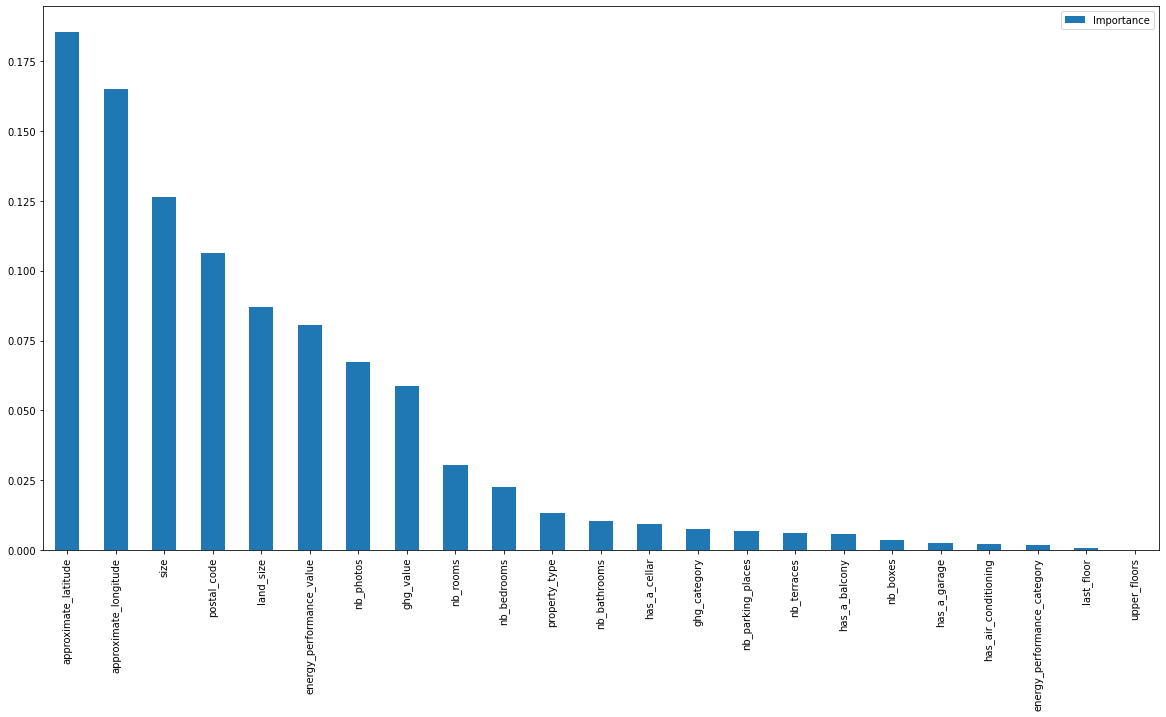

In [58]:
# afficher l'importance de nos variables par ordre croissant
def affichage_importance(model, X_train):
    importance = model.best_estimator_.feature_importances_
    importance = pd.DataFrame(importance, index = X_train.columns, columns=["Importance"])
    importance.sort_values(by='Importance', ascending=False, inplace=True)
    importance.plot(kind='bar', figsize=(20, 10))
    plt.show()

# on applique la fonction sur notre grid
affichage_importance(grid, X_train_prep)

In [52]:
# refaire la même démarche avec le DecisionTreeRegressor()
model = DecisionTreeRegressor()

# évaluation du modèle de base
score = cross_val_score(model, X_train_prep, y_train.values.ravel(), cv=3, scoring=custom_metric)
print(score)

# on crée une liste de paramètre pour le modèle DecisionTreeRegressor
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                'max_features': ['auto', 'sqrt', 'log2']}

grid = RandomizedSearchCV(DecisionTreeRegressor(), param_grid, refit=True, verbose=3, scoring=custom_metric)

# reduire le nombre de CV dans le grid
grid.cv = 2

# on entraine le modèle
grid.fit(X_train_prep, y_train.values.ravel())

# on applique la fonction sur notre grid
affichage_grid(grid)

[-155.06173373 -150.90104552 -152.41659374]
Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END max_depth=9, max_features=log2, min_samples_leaf=9, min_samples_split=8;, score=-117.259 total time=   0.0s
[CV 2/2] END max_depth=9, max_features=log2, min_samples_leaf=9, min_samples_split=8;, score=-118.664 total time=   0.0s
[CV 1/2] END max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=5;, score=-116.822 total time=   0.0s
[CV 2/2] END max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=5;, score=-119.474 total time=   0.0s
[CV 1/2] END max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=8;, score=-116.446 total time=   0.0s
[CV 2/2] END max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=8;, score=-118.076 total time=   0.0s
[CV 1/2] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10;, score=-116.349 total time=   0.0s
[CV 2/2] END max_depth=3, max_features=sqrt, mi

In [ ]:
# affichage importance features
affichage_importance(grid, X_train_prep)

In [60]:
#import xgb
import xgboost as xgb

In [65]:
# refaire la même démarche avec xgboost()
model = xgb.XGBRegressor()

# recupéraration des hyperparamètres du model
model.get_xgb_params()

# faire une liste de paramètre pour le modèle xgboost avec les hyperparamètres : learning_rate,  'booster' ,'max_depth' et 'num_parallel_tree'.
#0.1 , 15 ,300
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                'booster': ['gbtree', 'gblinear', 'dart'],
                'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                'num_parallel_tree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                'n_estimators' : [100,200,300]}


[-120.15714004 -121.82091489]
Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END booster=gbtree, learning_rate=0.3, max_depth=7, n_estimators=100, num_parallel_tree=8;, score=-121.802 total time=   6.2s
[CV 2/2] END booster=gbtree, learning_rate=0.3, max_depth=7, n_estimators=100, num_parallel_tree=8;, score=-123.521 total time=   7.3s
[CV 1/2] END booster=dart, learning_rate=0.05, max_depth=5, n_estimators=200, num_parallel_tree=7;, score=-116.796 total time= 2.2min
[CV 2/2] END booster=dart, learning_rate=0.05, max_depth=5, n_estimators=200, num_parallel_tree=7;, score=-118.465 total time= 2.6min
[10:49:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth", "num_parallel_tree" } are not used.

[CV 1/2] END booster=gblinear, learning_rate=0.01, max_depth=6, n_estimators=100, num_parallel_tree=8;, score=-97.053 total time=   0.9s
[10:49:58] WAR

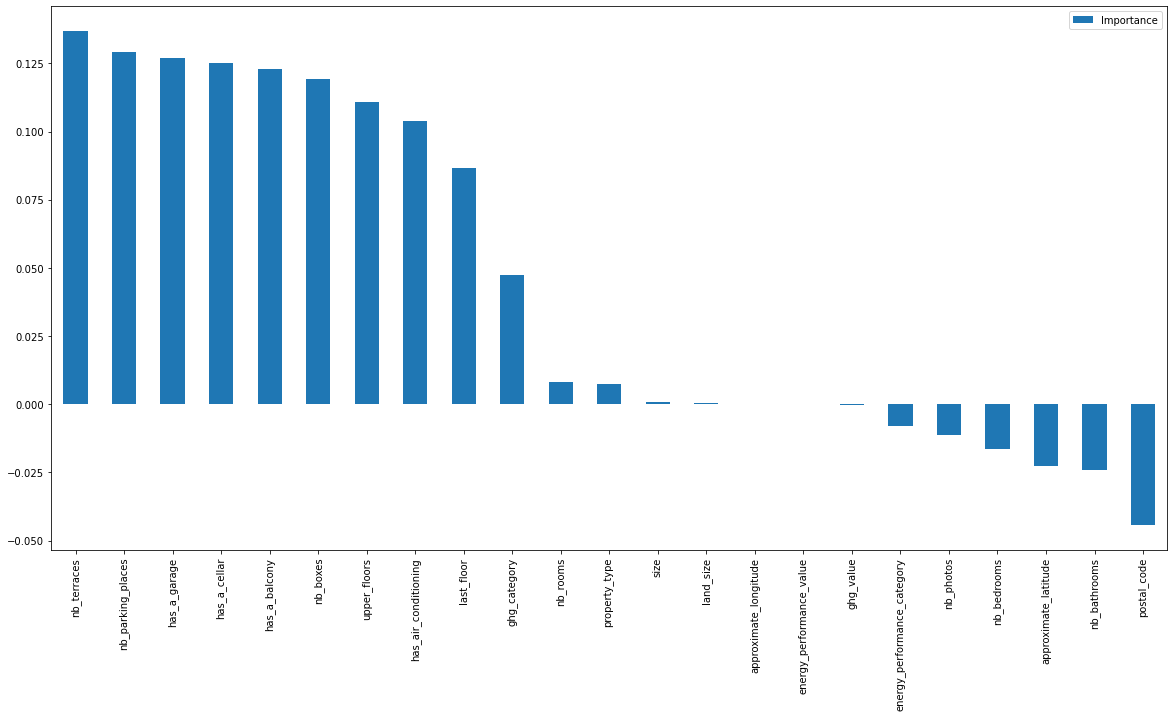

In [66]:
# refaire la même démarche avec xgboost()
model = xgb.XGBRegressor()

# évaluation du modèle de base
score = cross_val_score(model, X_train_prep, y_train.values.ravel(), cv=2, scoring=custom_metric)
print(score)

grid = RandomizedSearchCV(xgb.XGBRegressor(), param_grid, refit=True, verbose=3, scoring=custom_metric)

# reduire le nombre de CV dans le grid
grid.cv = 2

# on entraine le modèle
grid.fit(X_train_prep, y_train.values.ravel())


# on applique la fonction sur notre grid
affichage_grid(grid)

# affichage importance features
affichage_importance(grid, X_train_prep)


### A faire

- refaire un notebook propre avec :
- import des datas propres
- noramlisation
- fill nan with KNNimputer
- fonction preprocessing propre